In [1]:
import numpy as np
np.random.seed(13)
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import np_utils
from keras import backend as K

from matplotlib import pyplot as plt
%matplotlib inline

Using CNTK backend


In [2]:
input_unit_size = 28*28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
def draw_digit(data, row, col, n):
    size = int(np.sqrt(data.shape[0]))
    plt.subplot(row, col, n)    
    plt.imshow(data.reshape(size, size))
    plt.gray()

In [4]:
x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_train /= 255

In [5]:
inputs = Input(shape=(input_unit_size,))
x = Dense(144, activation='relu')(inputs)
outputs = Dense(input_unit_size)(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adadelta')

In [6]:
model.fit(x_train, x_train, epochs=10, batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3296
Epoch 2/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.2078: 1s - loss: 0.21 - ETA:
Epoch 3/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.1817
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.1620
Epoch 5/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1514
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.1451: 0s - l
Epoch 7/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.1401
Epoch 8/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.1375
Epoch 9/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1339
Epoch 10/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.1316: 0s


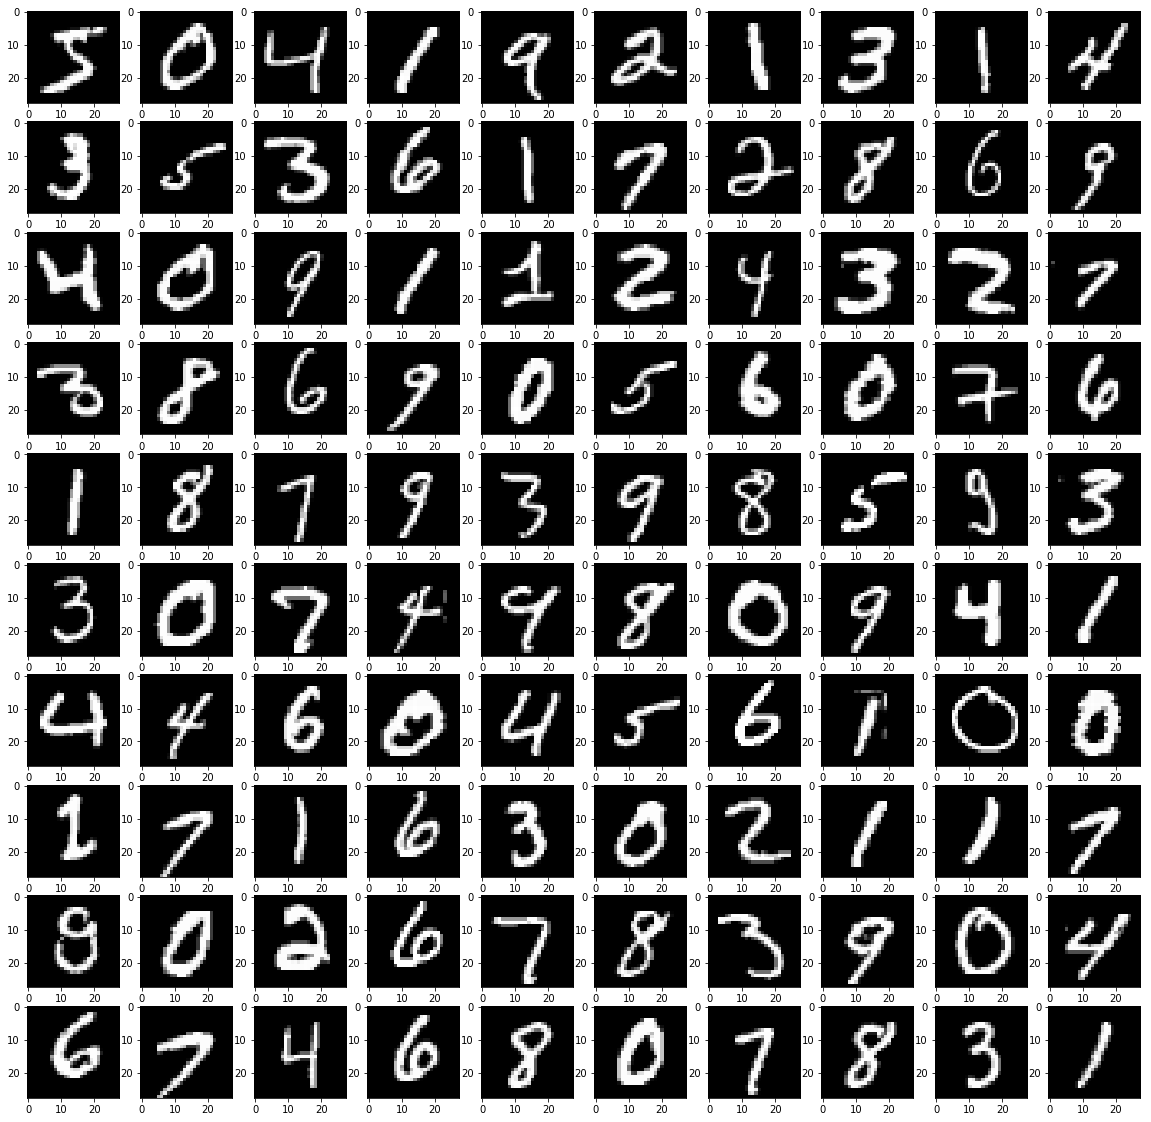

In [7]:
# raw image
show_size = 10
total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(x_train[total], show_size, show_size, total+1)
        total+=1
plt.show()

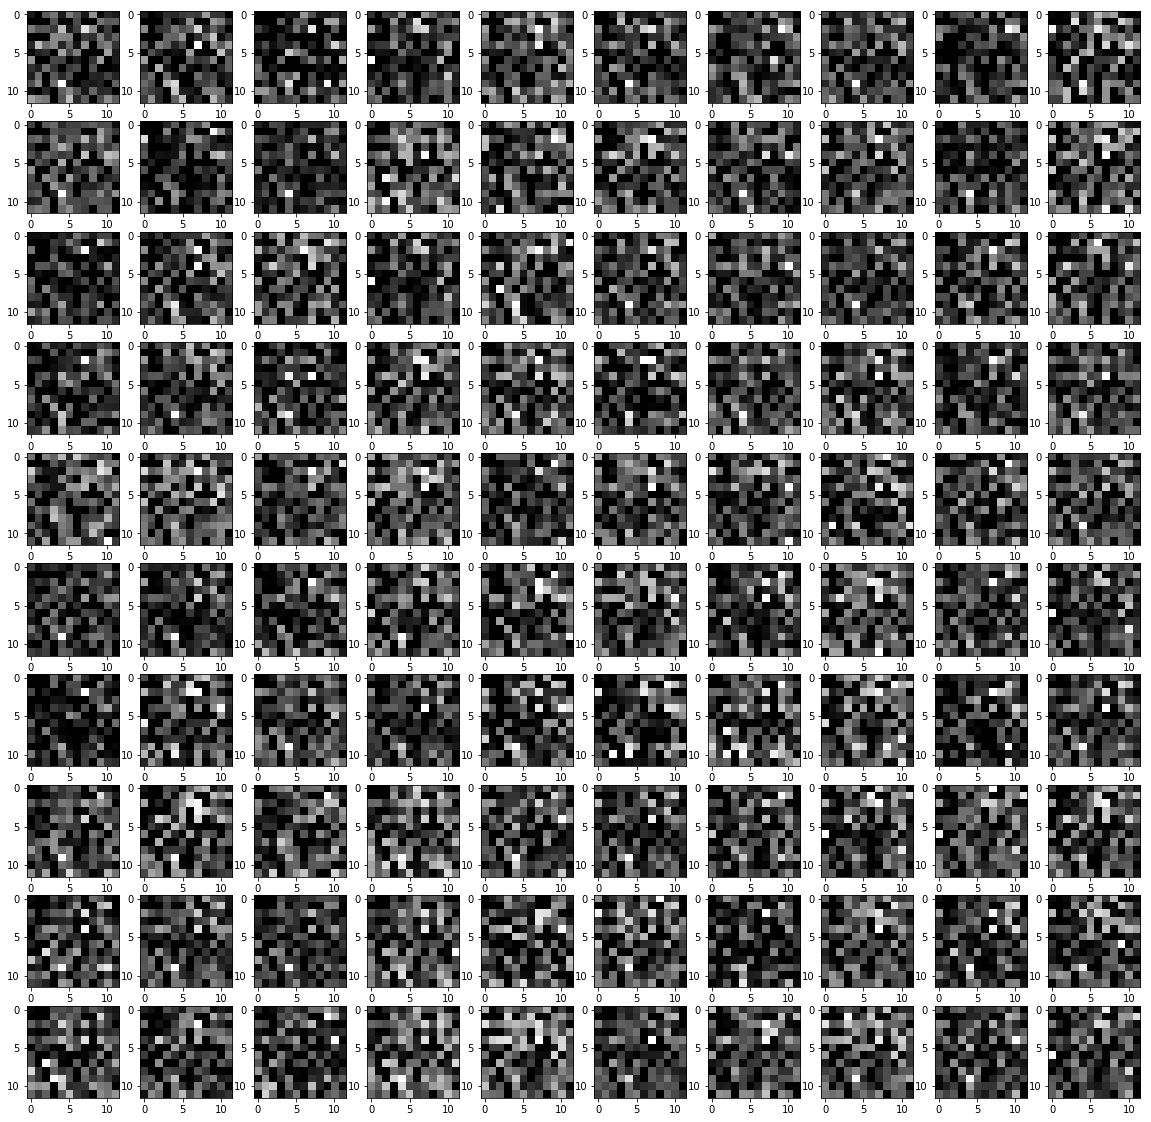

In [8]:
# hidden
get_layer_output = K.function([model.layers[0].input],
                              [model.layers[1].output])

hidden_outputs = get_layer_output([x_train[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(hidden_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

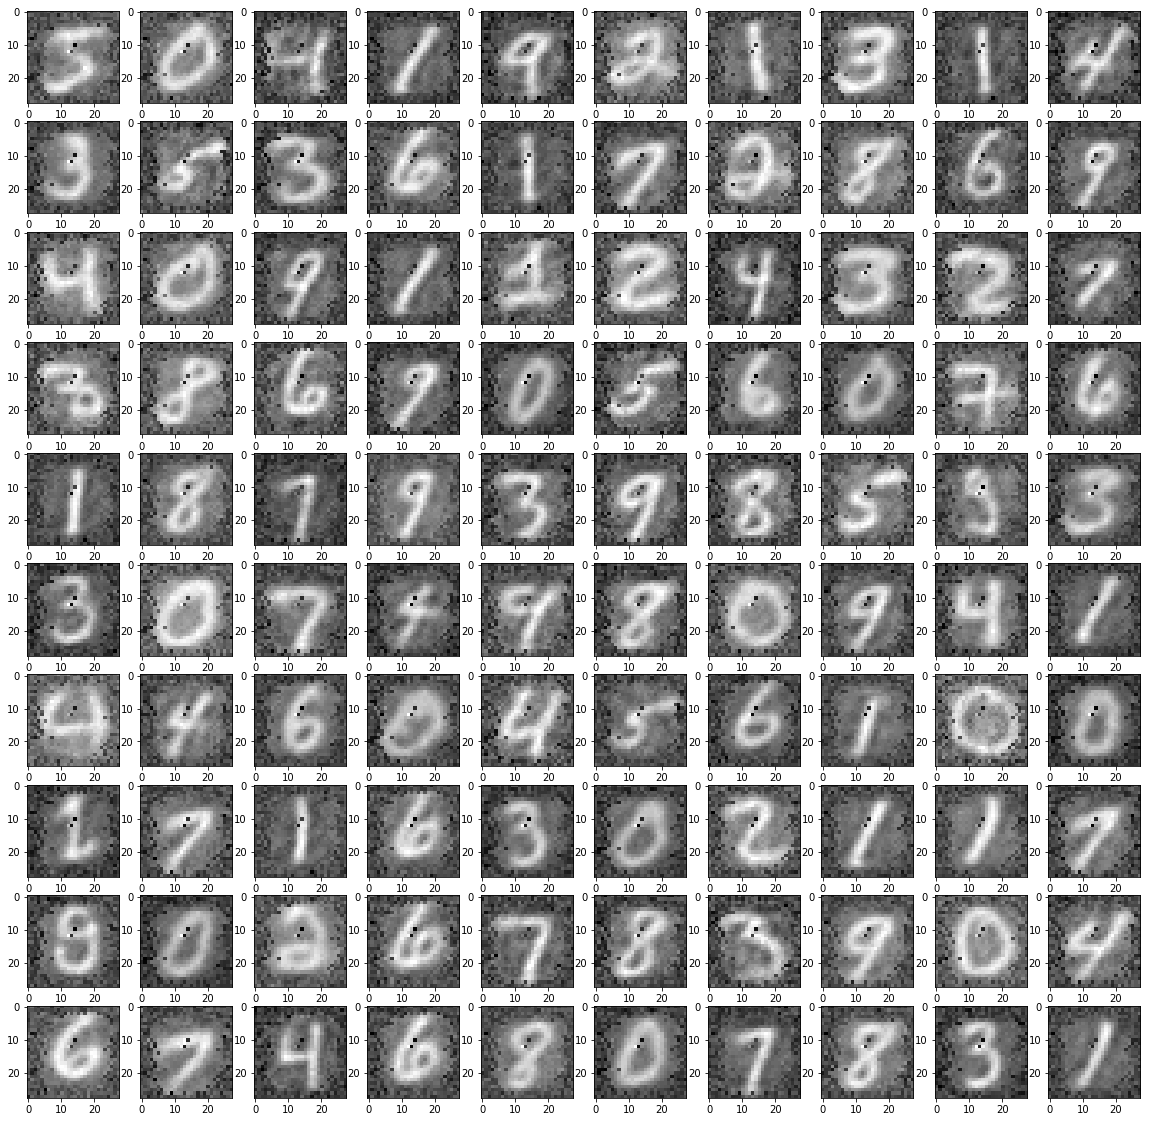

In [9]:
# reconstruct image
get_layer_output = K.function([model.layers[0].input],
                              [model.layers[2].output])

last_outputs = get_layer_output([x_train[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(20, 20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(last_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()